# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [8]:
# Your code here. 
import pandas as pd
import numpy as np
import seaborn as sns; # sns.set()
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# import statsmodels.api as sm
#import datetime as dt
#import seaborn as sns


#from pandas.plotting import register_matplotlib_converters
#register_matplotlib_converters()

# Define the values
x_values = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
y_values = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]

# Create the DataFrame with index as ID
student_data = pd.DataFrame({'Age': x_values, 'Tardies': y_values})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

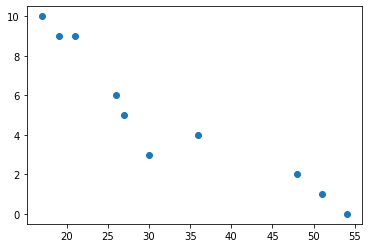

In [3]:
# Your code here.
plt.scatter(data=student_data,
            x="Age",
            y="Tardies");

# Alternatively with Seaborn:
#ax = sns.scatterplot(x="Age", y="Tardies", data=student_data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 
print("Yes. I can see a Trend. If we use basic statistics to descrive the trend we can say that: \n - There is one outlier but in general there is not much dispersion so the Standard Deviation should be small. \n - The covariance will be negative so we can say that the bigger the x value (Age) the smaller the y value (Tardies) \n - Since the dispersion is quite moderate, we will probably obtain a strong negative correlation.")

Yes. I can see a Trend. If we use basic statistics to descrive the trend we can say that: 
 - There is one outlier but in general there is not much dispersion so the Standard Deviation should be small. 
 - The covariance will be negative so we can say that the bigger the x value (Age) the smaller the y value (Tardies) 
 - Since the dispersion is quite moderate, we will probably obtain a strong negative correlation.


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
# Correlation coef. 
corr = np.corrcoef(x=student_data["Age"],
            y=student_data["Tardies"],
            rowvar=True)[0][1]
print(f"The corr. coef. is {corr}, strong correlation.")

# Covariance
cov = np.cov(m=student_data["Age"],
       y=student_data["Tardies"])[0][1]
print(f"The covariance is {cov} so the direction will be negative.")

The corr. coef. is -0.9391626886887122, strong correlation.
The covariance is -45.56666666666666 so the direction will be negative.


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [10]:
# Your response here.
# We are going to use Statsmodels since it is faster
student_data = sm.add_constant(student_data)
student_data.head()

,const,Age,Tardies
0,1.0,17,10
1,1.0,51,1
2,1.0,27,5
3,1.0,21,9
4,1.0,36,4


In [11]:
# Run OLS
lin_reg = sm.OLS(student_data["Tardies"],
                 student_data[["const", "Age"]])

In [12]:
result = lin_reg.fit()

In [13]:
result.summary()

/opt/miniconda3/envs/boogie_woogie/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           5.57e-05
Time:                        16:48:31   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Create a predictions column
result.predict(student_data[["const", "Age"]])

0    8.760850
1    0.504944
2    6.332643
3    7.789567
4    4.147256
5    1.233406
6    8.275209
7    6.575463
8   -0.223518
9    5.604180
dtype: float64

In [15]:
student_data = student_data.assign(y_hat=result.predict(student_data[["const", "Age"]]))

Plot your regression model on your scatter plot.

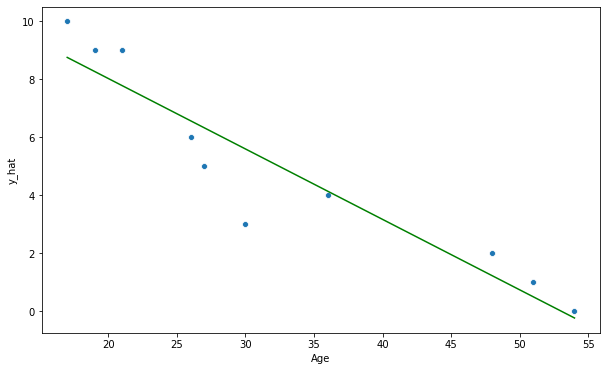

In [17]:
# Your code here.
fig, ax = plt.subplots(figsize=(10,6))

sns.scatterplot(data=student_data,
                x="Age",
                y="Tardies",
                ax=ax);

sns.lineplot(data=student_data,
             x="Age",
             y="y_hat",
             ax=ax,
             color="g");

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [19]:
# Your response here. 
print("Yes. Since our dataset only has 2 variables: 1 dependent and 1 independent makes this prediction accurate. There is a negative correlation between both variables. For each year older the user is the number of times that will be late increases by 0,24")

Yes. Since our dataset only has 2 variables: 1 dependent and 1 independent makes this prediction accurate. There is a negative correlation between both variables. For each year older the user is the number of times that will be late increases by 0,24


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [20]:
# Import any libraries you may need & the data

veh = pd.read_csv("../02_lab-regression-analysis/vehicles.csv")
veh.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [21]:
# Your response here. 

# Is there any way of doing all of them at once?
# variables = veh[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]].transpose()

corr_year = np.corrcoef(x=veh["Year"],
            y=veh['CO2 Emission Grams/Mile'],
            rowvar=True)[0][1]
corr_cyl = np.corrcoef(x=veh["Cylinders"],
            y=veh['CO2 Emission Grams/Mile'],
            rowvar=True)[0][1]
corr_barrels = np.corrcoef(x=veh["Fuel Barrels/Year"],
            y=veh['CO2 Emission Grams/Mile'],
            rowvar=True)[0][1]
corr_mpg = np.corrcoef(x=veh["Combined MPG"],
            y=veh['CO2 Emission Grams/Mile'],
            rowvar=True)[0][1]
corr_cost = np.corrcoef(x=veh["Fuel Cost/Year"],
            y=veh['CO2 Emission Grams/Mile'],
            rowvar=True)[0][1]

# Print results
print(f"Year: {corr_year}, Cylinders: {corr_cyl}, Fuel Barrels/Year: {corr_barrels}, Combined MPG: {corr_mpg}, Fuel Cost/Year: {corr_cost}")

# Analysis
print(f"The most important variables in determining CO2 emissions will be (descending order): \n 1. Fuel Barrels/Year \n 2. Fuel Cost/Year \n 3. Combined MPG \n 4. Cylinders \n 5. Year")

Year: -0.22229960295054238, Cylinders: 0.7523925537297486, Fuel Barrels/Year: 0.9861886621428727, Combined MPG: -0.9262290389336443, Fuel Cost/Year: 0.9308651512201844
The most important variables in determining CO2 emissions will be (descending order): 
 1. Fuel Barrels/Year 
 2. Fuel Cost/Year 
 3. Combined MPG 
 4. Cylinders 
 5. Year


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [26]:
# Add a constant
veh = sm.add_constant(veh)

In [28]:
# Your response here. 
y = veh["CO2 Emission Grams/Mile"] # Dependent variable
X = veh[["const", "Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]] # Independent variables

# Run OLS
veh_lr = sm.OLS(y, X).fit()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [29]:
# Your response here. 
# Call the summary
veh_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Tue, 30 Jun 2020   Prob (F-statistic):               0.00
Time:                             17:09:28   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
print("Without any doubt, the variable that has a bigger impact on the CO2 emissions is the \"Fuel Barrels/Year\". Per each 1 Barrer increase, the CO2 increases by 19. If the other values remain constant.")

Without any doubt, the variable that has a bigger impact on the CO2 emissions is the "Fuel Barrels/Year". Per each 1 Barrer increase, the CO2 increases by 19. If the other values remain constant.


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [66]:
# Your code here. 
invited = [1, 3, 4, 6, 8, 9, 11, 14]
attended = [1, 2, 4, 4, 5, 7, 8, 13]

party = pd.DataFrame({'Invited': invited, 'Attended': attended})
party.head()

,Invited,Attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

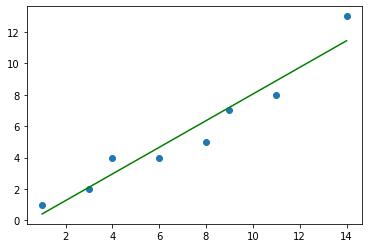

In [75]:
# Your code here.
plt.scatter(data=party,
            x='Invited',
            y='Attended');

# Draw the fit regression line
m, b = np.polyfit(party['Invited'], party['Attended'], 1)
plt.plot(party['Invited'], m*party['Invited'] + b, color="g");

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [76]:
# Your response here. 
print(f"This plot tell us that there is a positive relation between the two variables. The more invited, more attended. However, we can't tell with this graph if the relative percentage of the people that rejected has increased.")

This plot tell us that there is a positive relation between the two variables. The more invited, more attended. However, we can't tell with this graph if the relative percentage of the people that rejected has increased.


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [77]:
# Your response here. 
print("No. The correlation is strong between those 2 variables and there are significant outliers")

No. The correlation is strong between those 2 variables and there are significant outliers


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 